# **Q2)**

# i) Code the gradient descent algorithm for ridge regression.

In [2]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

df = np.loadtxt('/content/drive/MyDrive/Summers/A2Data_train.csv', delimiter=',')
data = df
x_train = data[:,0:100]
y_train = data[:, 100]
df2 = np.loadtxt('/content/drive/MyDrive/Summers/A2Data_test.csv', delimiter=',')

data2 = df2
x_test = data2[:,0:100]
y_test = data2[:, 100]

In [3]:
w = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y_train))

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Ridge cost function and its gradient
def ridge_cost(x, y, w, lambda_):
    m = x.shape[0]
    y_pred = np.dot(x, w)
    # return np.sum((y_pred - y)**2) / (2*m) + (lambda_ * np.sum(w**2))
    return np.sum((y_pred - y)**2) / (2*m)

def ridge_gradient(x, y, w, lambda_):
    m = x.shape[0]
    y_pred = np.dot(x, w)
    return np.dot(x.T, np.dot(x,w) - y) / m + (2 * lambda_ * w)
def ridge_regression(x,y,lambda_):
    alpha = 0.01
    num_iterations = 1000
    w_new = np.random.rand(x.shape[1])

    # Initialize an array to store the cost at each iteration
    cost_history = np.zeros(num_iterations)
    diff_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        w_new = w_new - alpha * ridge_gradient(x, y, w_new, lambda_)
        cost_history[i] = ridge_cost(x, y, w_new, lambda_)
        diff_history[i] = np.linalg.norm(w_new - w)
        
    return w_new,cost_history


# ii) Cross validation and testing

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error  
K = 10
fold_size = len(x_train)//K
def k_fold(x_train, y_train,L):
    mse_K_fold = []
    r2_K_fold = []
    np.random.seed(42)
    shuffle_indices = np.random.permutation(len(x_train))
    X_train_shuffled = x_train[shuffle_indices]
    y_train_shuffled = y_train[shuffle_indices]
    for i in range(K):
        start = i * fold_size
        end = (i + 1) * fold_size
        X_valid = X_train_shuffled[start:end]
        y_valid = y_train_shuffled[start:end]
        X_train_part = np.concatenate([X_train_shuffled[:start], X_train_shuffled[end:]])
        y_train_part = np.concatenate([y_train_shuffled[:start], y_train_shuffled[end:]])
        w,cost= ridge_regression(X_train_part,y_train_part,L)
        y_pred = np.dot(X_valid,w)
        mse_K_fold.append(mean_squared_error(y_valid, y_pred))
    mse_avg = sum(mse_K_fold)/len(mse_K_fold)
    return mse_avg


In [6]:
mse_lambda = []
L_value = np.arange(0,1,0.05)
for lamda in L_value:
    print("Lambda: ",lamda)
    mse = k_fold(x_train,y_train,lamda)
    print("mse: ",mse)
    mse_lambda.append(mse)

Lambda:  0.0
mse:  0.20991801640879384
Lambda:  0.05
mse:  0.13508160968871555
Lambda:  0.1
mse:  0.1482071391908322
Lambda:  0.15000000000000002
mse:  0.16586614697432606
Lambda:  0.2
mse:  0.17951244825741502
Lambda:  0.25
mse:  0.1897212887381361
Lambda:  0.30000000000000004
mse:  0.19761748517852815
Lambda:  0.35000000000000003
mse:  0.203990101211095
Lambda:  0.4
mse:  0.2093428342172098
Lambda:  0.45
mse:  0.2139989825792012
Lambda:  0.5
mse:  0.21817160164564697
Lambda:  0.55
mse:  0.22200529614534462
Lambda:  0.6000000000000001
mse:  0.2256009650444179
Lambda:  0.65
mse:  0.22903075619603008
Lambda:  0.7000000000000001
mse:  0.23234735798854594
Lambda:  0.75
mse:  0.23558994111933704
Lambda:  0.8
mse:  0.2387880647140826
Lambda:  0.8500000000000001
mse:  0.2419643108298204
Lambda:  0.9
mse:  0.2451361032255519
Lambda:  0.9500000000000001
mse:  0.2483169896869221


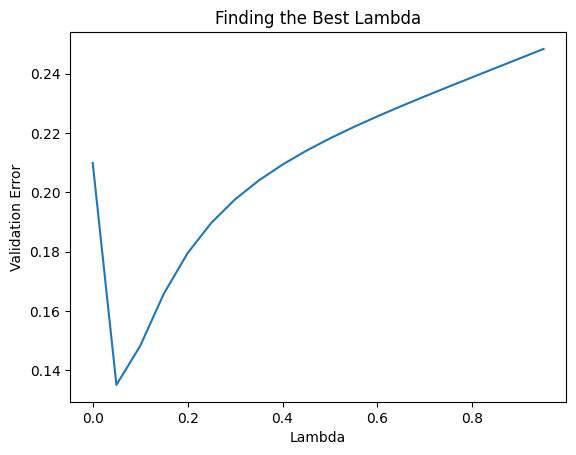

In [7]:
plt.plot(L_value,mse_lambda)
plt.xlabel("Lambda")
plt.ylabel("Validation Error")
plt.title("Finding the Best Lambda")
plt.show()

# **Minimum error is obtained for the value $0.05$**

In [8]:
print(x_train.shape)

(10000, 100)


In [9]:
wML = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)), np.dot(x_train.T, y_train))

In [10]:
def model_analysis(w,X_train,X_test,y_train,y_test):
  y_pred_train = np.dot(x_train, w)
  y_pred_test = np.dot(x_test, w)
  training_error = mean_squared_error(y_train, y_pred_train)
  test_error = mean_squared_error(y_test, y_pred_test)
  print("Training set MSE: {:.5f}".format(training_error))
  print("Test set MSE: {:.5f}".format(test_error))

In [13]:
print("Error due to ML estimation")
model_analysis(wML,x_train,x_test,y_train,y_test)
wR,cost = ridge_regression(x_train,y_train,0.05)
print("Error due to Ridge regression")
model_analysis(wR,x_train,x_test,y_train,y_test)

Error due to ML estimation
Training set MSE: 0.03969
Test set MSE: 0.37073
Error due to Ridge regression
Training set MSE: 0.13881
Test set MSE: 0.23980
